In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
sensor_data = pd.read_csv("D:/Pyspark-folder/Maintenance-Industrial-IOT/sensor1.csv")
sensor_data.head()

,ID,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,machine_status,timestamp
0,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:00
1,2,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:01
2,3,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,01-04-18 0:02
3,4,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,01-04-18 0:03
4,5,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,01-04-18 0:04


In [3]:
sensor_vars = sensor_data.columns[0:51]
print(sensor_vars)
print(sensor_data.columns)

Index(['ID', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49'],
      dtype='object')
Index(['ID', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_1

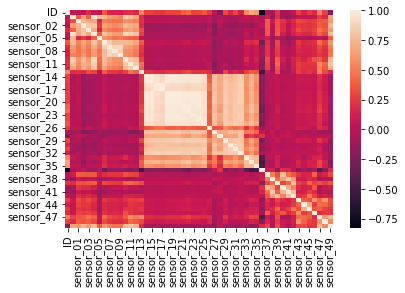

In [4]:
corr_matrix = sensor_data.iloc[:,0:51].corr()
sns.heatmap(corr_matrix, annot=False)

plt.rcParams["figure.figsize"] = [15,15]
plt.show()

In [5]:
counter = 0
for i in range(0,51):
    for j in range(i+1,51):
        if((corr_matrix.iloc[i,j]>0.7)|(corr_matrix.iloc[i,j]<-0.7)):
            print(counter,i,j,corr_matrix.iloc[i,j])
            counter = counter+1

0 0 37 -0.8291001542058636
1 1 5 0.9428999055250306
2 1 6 0.7566563857417025
3 1 7 0.7507366009055012
4 1 11 0.8614480538551018
5 1 12 0.7707212978326299
6 2 3 0.7374064455579192
7 3 4 0.8223386790391445
8 3 5 0.8203922430541137
9 3 11 0.7565898212621941
10 3 12 0.7113326110198461
11 3 50 0.7490863253372084
12 5 7 0.8038762796092045
13 5 11 0.9075540328705785
14 5 12 0.862637161130918
15 5 13 0.8031656382863029
16 5 50 0.7738396713474919
17 7 8 0.8530357884776147
18 7 9 0.7640213710291174
19 7 10 0.7750287392354733
20 7 11 0.7609655848777878
21 7 12 0.7547649167138246
22 8 9 0.9067178677096641
23 8 10 0.9028351433443043
24 9 10 0.8448857330079766
25 11 12 0.8258940911552941
26 11 13 0.7663216331772968
27 11 50 0.7606816178775552
28 12 13 0.8317067001508044
29 12 50 0.8005653676570874
30 13 50 0.7247684727401991
31 15 16 0.9903591662548819
32 15 17 0.9301880155564075
33 15 18 0.9011021448087404
34 15 19 0.983040304147985
35 15 20 0.9799840382673692
36 15 21 0.9717043612300369
37 15 22 0

In [6]:
normal_data = sensor_data.loc[sensor_data["machine_status"]=="NORMAL"]
broken_data = sensor_data.loc[sensor_data["machine_status"]=="BROKEN"]
recovering_data = sensor_data.loc[sensor_data["machine_status"]=="RECOVERING"]
print(normal_data)
print(len(normal_data), len(recovering_data), len(broken_data))

Empty DataFrame
Columns: [ID, sensor_00, sensor_01, sensor_02, sensor_03, sensor_04, sensor_05, sensor_06, sensor_07, sensor_08, sensor_09, sensor_10, sensor_11, sensor_12, sensor_13, sensor_14, sensor_15, sensor_16, sensor_17, sensor_18, sensor_19, sensor_20, sensor_21, sensor_22, sensor_23, sensor_24, sensor_25, sensor_26, sensor_27, sensor_28, sensor_29, sensor_30, sensor_31, sensor_32, sensor_33, sensor_34, sensor_35, sensor_36, sensor_37, sensor_38, sensor_39, sensor_40, sensor_41, sensor_42, sensor_43, sensor_44, sensor_45, sensor_46, sensor_47, sensor_48, sensor_49, sensor_50, machine_status, timestamp]
Index: []

[0 rows x 54 columns]
0 0 0


In [7]:
mean_df = pd.DataFrame(np.zeros((51,4))) # add min and max and distribution plots and try after normalizing data
mean_df.columns = ("Overall","NORMAL","RECOVERING","BROKEN")
for i in range(0,51):
    mean_df.iloc[i,0] = sensor_data.iloc[:,i].mean()
    mean_df.iloc[i,1] = normal_data.iloc[:,i].mean()
    mean_df.iloc[i,2] = recovering_data.iloc[:,i].mean()
    mean_df.iloc[i,3] = broken_data.iloc[:,i].mean()
#mean_df

In [8]:
median_df = pd.DataFrame(np.zeros((51,4)))
median_df.columns = ("Overall","NORMAL","RECOVERING","BROKEN")
for i in range(0,51):
    median_df.iloc[i,0] = sensor_data.iloc[:,i].describe()[5]
    median_df.iloc[i,1] = normal_data.iloc[:,i].describe()[5]
    median_df.iloc[i,2] = recovering_data.iloc[:,i].describe()[5]
    median_df.iloc[i,3] = broken_data.iloc[:,i].describe()[5]
#median_df

In [9]:
colors = pd.DataFrame(np.zeros(len(sensor_data)))
for i in range(0,len(colors)):
    if(sensor_data["machine_status"][i] == "NORMAL"):
        colors.iloc[i] = 0
    if(sensor_data["machine_status"][i] == "BROKEN"):
        colors.iloc[i] = 1
    if(sensor_data["machine_status"][i] == "RECOVERING"):
        colors.iloc[i] = 2

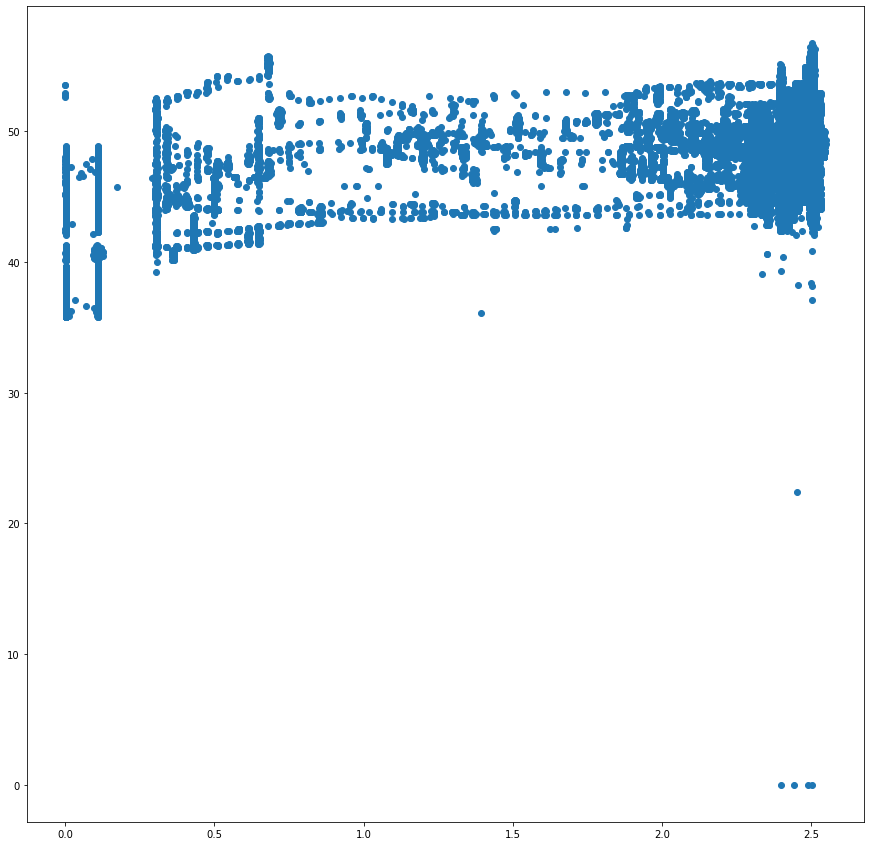

In [10]:
plt.scatter(sensor_data['sensor_00'], sensor_data['sensor_01'])

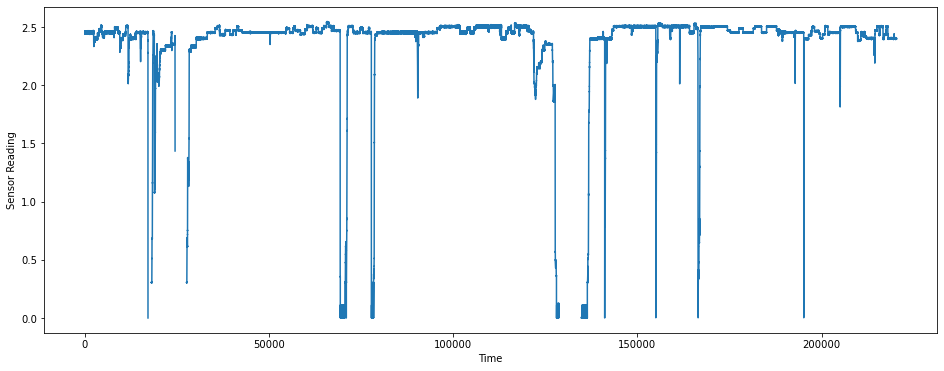

In [11]:
sensor_num = '00'

plt.figure(figsize = (16,6))
plt.plot('sensor_' + sensor_num, data = sensor_data)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.show()

In [12]:
sensor_data['timestamp'] = pd.to_datetime(sensor_data['timestamp'], format='%d-%m-%y %H:%M')


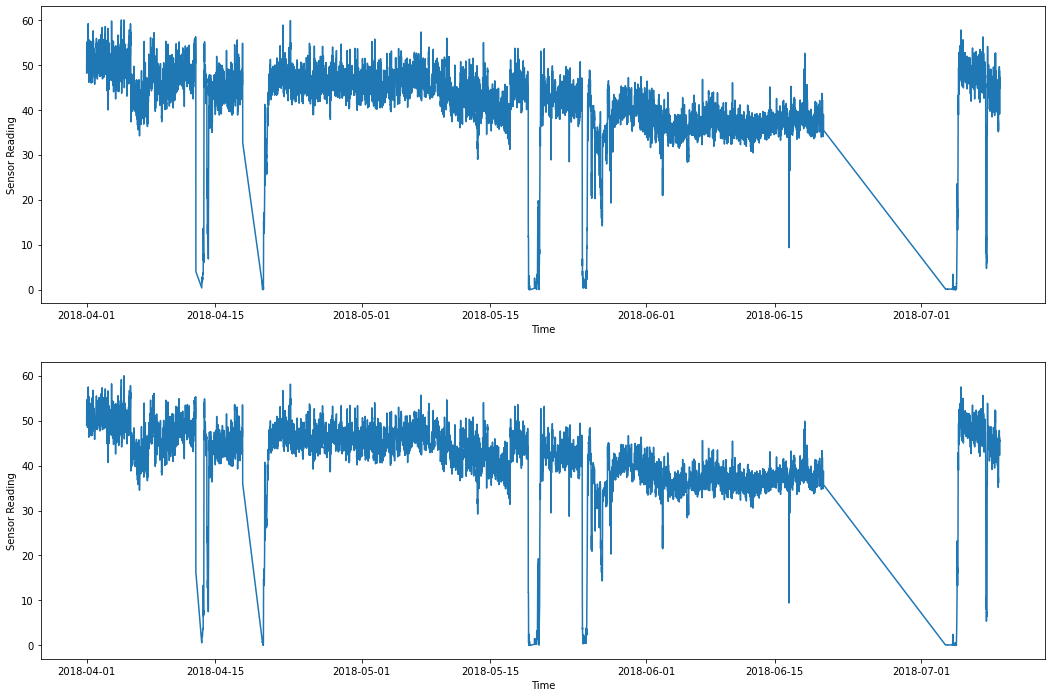

In [13]:
#Aggregating Sensor Data by 5 minutes and 10 minutes

sensor_data_5T = sensor_data.drop(columns = ['ID', 'machine_status']).resample('5T', on = 'timestamp').mean().dropna()
sensor_data_10T = sensor_data.drop(columns = ['ID', 'machine_status']).resample('10T', on = 'timestamp').mean().dropna()

sensor_num = '11'

plt.figure(figsize = (18,12))

plt.subplot(2, 1, 1)
plt.plot('sensor_' + sensor_num, data = sensor_data_5T)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

plt.subplot(2, 1, 2)
plt.plot('sensor_' + sensor_num, data = sensor_data_10T)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')

plt.show()

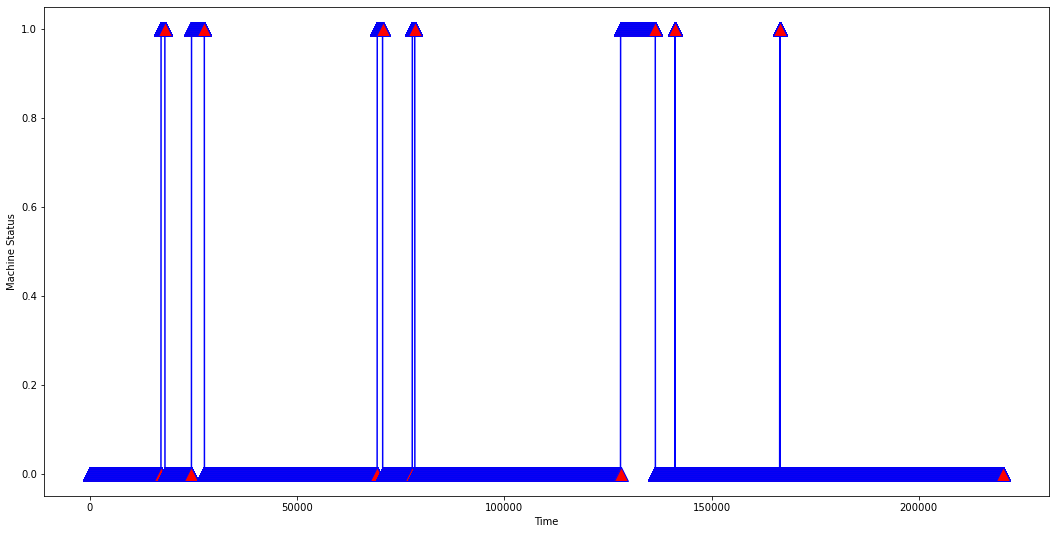

In [14]:
markColors = ['b' if entry == 0 else 'r' for entry in sensor_data['machine_status']]

plt.figure(figsize = (18,9))
# plt.scatter(np.arange(len(sensor_data['sensor_00'])), 'machine_status', data = sensor_data, color = markColors)
plt.plot(np.arange(len(sensor_data['sensor_00'])), 'machine_status', data = sensor_data, color = 'b', marker = '^', ms = 14, mfc = 'r')
plt.xlabel('Time')
plt.ylabel('Machine Status')
plt.show()
#

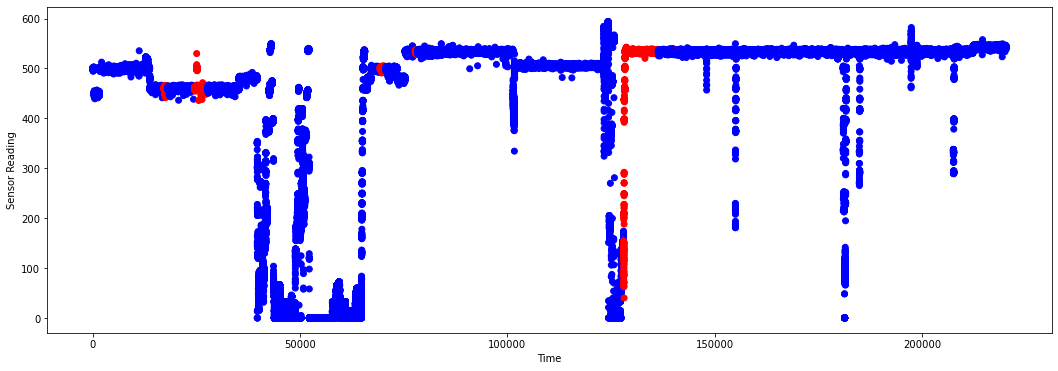

In [15]:
#Marking Sensor Data for Normal/Repair

sensor_num = '21'

markColors = ['b' if entry == 0 else 'r' for entry in sensor_data['machine_status']]

plt.figure(figsize = (18,6))
plt.scatter(np.arange(len(sensor_data['sensor_00'])), 'sensor_' + sensor_num, data = sensor_data, color = markColors)
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.show()

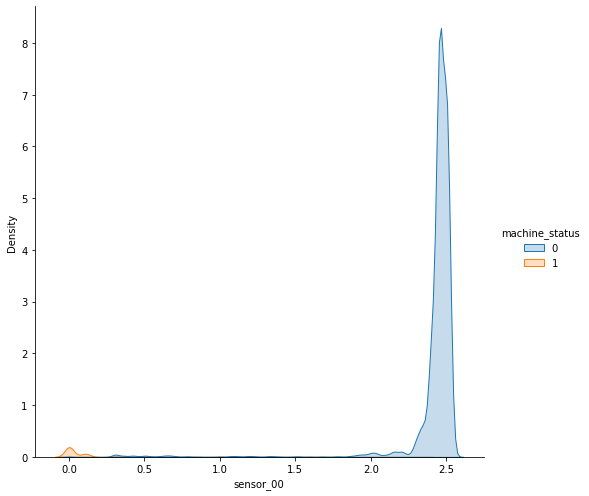

In [16]:
#Studying Distribution characteristics of Sensor Data based on Normal/Repair Status

sensor_num = '00'

sns.displot(sensor_data, x ='sensor_' + sensor_num, hue='machine_status', kind="kde", fill=True,
            height = 7)

In [17]:
# Investigation of the Statistical characteristics of Normal/Repair readings

normal_data = sensor_data[sensor_data['machine_status'] == 1].drop(columns = ['ID', 'machine_status', 'timestamp'])
repair_data = sensor_data[sensor_data['machine_status'] == 0].drop(columns = ['ID', 'machine_status', 'timestamp'])

Sensor_Stats = pd.DataFrame()
Sensor_Stats['Normal_Means'] = normal_data.mean(axis = 0, skipna = True)
Sensor_Stats['Normal_Vars'] = normal_data.var(axis = 0, skipna = True)
Sensor_Stats['Repair_Means'] = repair_data.mean(axis = 0, skipna = True)
Sensor_Stats['Repair_Vars'] = repair_data.var(axis = 0, skipna = True)
Sensor_Stats['Mean_Difference'] = abs(Sensor_Stats['Normal_Means'] - Sensor_Stats['Repair_Means'])
Sensor_Stats['Var_Difference'] = abs(Sensor_Stats['Normal_Vars'] - Sensor_Stats['Repair_Vars'])

Sensor_Stats

# type(normal_data.mean(axis = 0, skipna = True))

,Normal_Means,Normal_Vars,Repair_Means,Repair_Vars,Mean_Difference,Var_Difference
sensor_00,0.055215,0.026657,2.420476,0.058793,2.365261,0.032135
sensor_01,39.221386,19.084946,48.180116,5.018374,8.958730,14.066572
sensor_02,39.922701,26.288765,51.636949,3.528007,11.714249,22.760758
sensor_03,37.856698,12.280504,44.167060,2.783092,6.310362,9.497412
sensor_04,93.034093,13913.784072,625.673284,2582.945224,532.639191,11330.838848
sensor_05,45.060385,2443.188089,75.389764,88.016424,30.329379,2355.171665
sensor_06,5.784861,25.830688,13.865073,0.748127,8.080211,25.082560
sensor_07,8.495140,50.563769,16.165959,0.360549,7.670819,50.203220
sensor_08,9.117674,48.887795,15.478129,0.346457,6.360455,48.541338
sensor_09,8.822057,51.109672,15.086662,0.328294,6.264605,50.781378


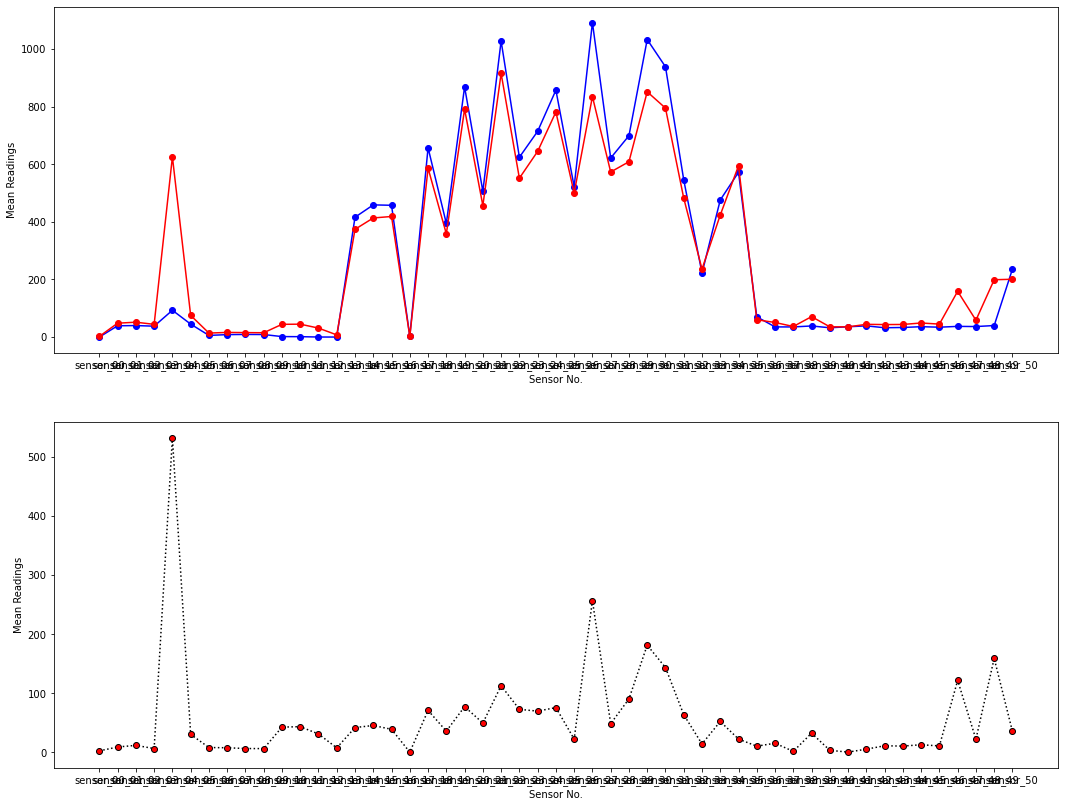

In [18]:
plt.figure(figsize = (18,14))

plt.subplot(2,1,1)
plt.plot(Sensor_Stats.index, Sensor_Stats['Normal_Means'], 'b', marker = 'o', mfc = 'b')
plt.plot(Sensor_Stats.index, Sensor_Stats['Repair_Means'], 'r', marker = 'o', mfc = 'r')
plt.xlabel('Sensor No.')
plt.ylabel('Mean Readings')

plt.subplot(2,1,2)
plt.plot(Sensor_Stats.index, Sensor_Stats['Mean_Difference'], ':k', marker = 'o', mfc = 'r')
plt.xlabel('Sensor No.')
plt.ylabel('Mean Readings')

plt.show()

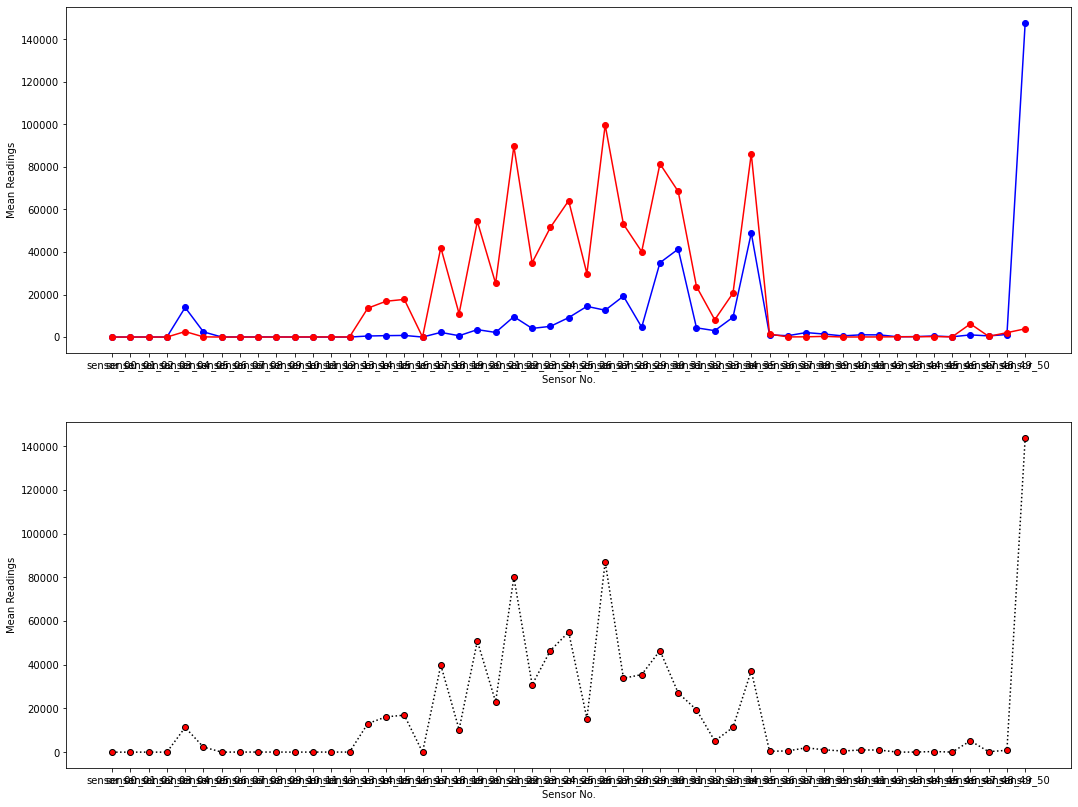

In [19]:
plt.figure(figsize = (18,14))

plt.subplot(2,1,1)
plt.plot(Sensor_Stats.index, Sensor_Stats['Normal_Vars'], 'b', marker = 'o', mfc = 'b')
plt.plot(Sensor_Stats.index, Sensor_Stats['Repair_Vars'], 'r', marker = 'o', mfc = 'r')
plt.xlabel('Sensor No.')
plt.ylabel('Mean Readings')

plt.subplot(2,1,2)
plt.plot(Sensor_Stats.index, Sensor_Stats['Var_Difference'], ':k', marker = 'o', mfc = 'r')
plt.xlabel('Sensor No.')
plt.ylabel('Mean Readings')

plt.show()

In [20]:
repair_data = sensor_data[sensor_data['machine_status'] == 1].drop(columns = ['ID', 'machine_status', 'timestamp'])
repair_dev = abs(repair_data.sub(Sensor_Stats['Normal_Means'], axis = 1))

repair_dev['timestamp'] = sensor_data[sensor_data['machine_status'] == 1]['timestamp']

repair_dev.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,timestamp
17155,0.055215,14.337634,12.855069,5.546077,111.691004,8.681755,2.739433,8.93107,6.623066,7.352713,...,10.544527,17.983558,17.927101,13.121408,15.187357,394.561697,96.604757,379.239968,105.694077,2018-04-12 21:56:00
17156,0.055215,14.337634,12.855069,5.546077,108.103037,7.439575,1.752755,5.03929,0.206690,7.229733,...,9.242447,17.404858,17.637751,11.963998,19.527627,414.237597,103.549157,393.128868,230.115377,2018-04-12 21:57:00
17157,0.055215,13.556384,12.768269,5.546072,110.996562,12.138365,1.825092,8.11366,7.086026,7.273143,...,7.940367,15.668748,17.059041,11.385288,23.867907,429.283897,108.468157,402.677468,129.999677,2018-04-12 21:58:00
17158,0.055215,13.382774,12.811669,5.589482,110.533595,5.901425,1.788924,8.20770,7.042626,7.265903,...,6.898697,15.090038,16.480341,10.517238,29.365597,437.675097,112.519057,409.621968,138.390877,2018-04-12 21:59:00
17159,NaN,13.295974,12.768269,5.589482,110.533595,4.729095,1.774456,8.07025,7.122196,7.229733,...,5.336197,13.932638,14.744231,9.070478,40.939667,440.568597,126.118557,408.753868,120.161677,2018-04-12 22:00:00


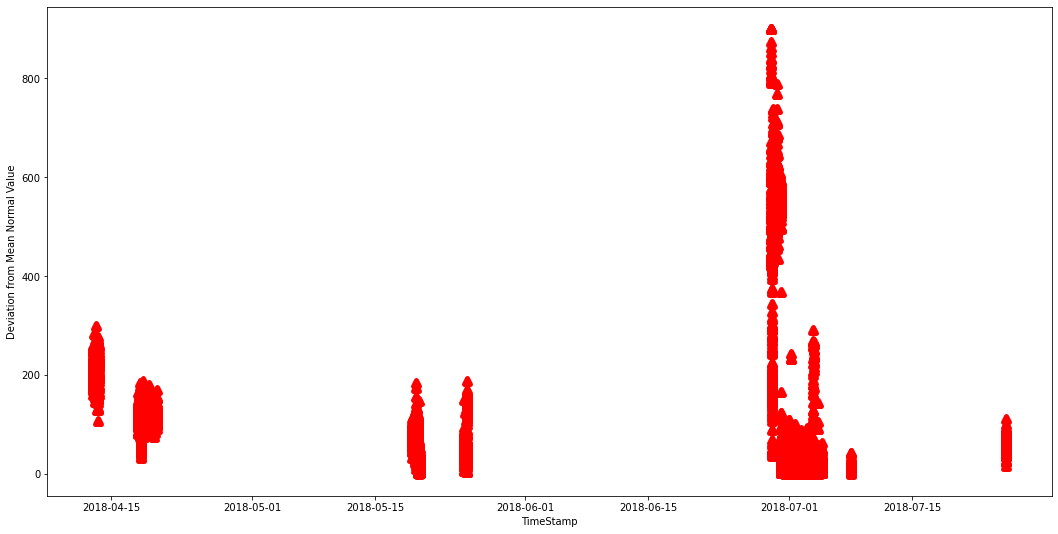

In [21]:
#Abs Sensor Reading Deviations from Mean with Time

sensor_num = '31'

plt.figure(figsize = (18,9))
plt.scatter(repair_dev['timestamp'], repair_dev['sensor_' + sensor_num], c = 'r', marker = '^', linewidths = 5)

plt.xlabel('TimeStamp')
plt.ylabel('Deviation from Mean Normal Value')
plt.show()
#

In [22]:
sensor_data = sensor_data.dropna()
#print(sensor_data)

In [23]:
col_names = sensor_data.columns
#print(col_names)
indep_vars = col_names[0:52]
depep_vars = col_names[52]

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz 
from IPython.display import Image  

In [25]:
X = sensor_data[indep_vars]
y = sensor_data[depep_vars]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [26]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")

In [27]:
model_df

{}

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,y)

LogisticRegression() accuracy is 0.9922753988245172


In [30]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,y)

RandomForestClassifier() accuracy is 0.9998320738874895


In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,y)

DecisionTreeClassifier() accuracy is 0.999664147774979


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,y)

GradientBoostingClassifier() accuracy is 0.9995801847187238


In [33]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [35]:
# Map the predicted labels to descriptive strings
prediction_mapping = {1: "Machine Needs Service", 0: "No Servies Required"}
y_pred_mapped = [prediction_mapping[prediction] for prediction in y_pred]

In [36]:
# Print the predicted output
print("Predicted Output:")
for i, prediction in enumerate(y_pred_mapped):
    print(f"Output {i+1}: {prediction}")

Predicted Output:
Output 1: No Servies Needed
Output 2: No Servies Needed
Output 3: No Servies Needed
Output 4: No Servies Needed
Output 5: No Servies Needed
Output 6: No Servies Needed
Output 7: No Servies Needed
Output 8: No Servies Needed
Output 9: No Servies Needed
Output 10: No Servies Needed
Output 11: No Servies Needed
Output 12: No Servies Needed
Output 13: No Servies Needed
Output 14: No Servies Needed
Output 15: No Servies Needed
Output 16: No Servies Needed
Output 17: No Servies Needed
Output 18: No Servies Needed
Output 19: No Servies Needed
Output 20: No Servies Needed
Output 21: No Servies Needed
Output 22: No Servies Needed
Output 23: No Servies Needed
Output 24: No Servies Needed
Output 25: No Servies Needed
Output 26: No Servies Needed
Output 27: No Servies Needed
Output 28: No Servies Needed
Output 29: No Servies Needed
Output 30: No Servies Needed
Output 31: No Servies Needed
Output 32: No Servies Needed
Output 33: No Servies Needed
Output 34: No Servies Needed
Outpu

Output 1537: Machine Needs Service
Output 1538: No Servies Needed
Output 1539: No Servies Needed
Output 1540: No Servies Needed
Output 1541: No Servies Needed
Output 1542: No Servies Needed
Output 1543: No Servies Needed
Output 1544: No Servies Needed
Output 1545: No Servies Needed
Output 1546: No Servies Needed
Output 1547: No Servies Needed
Output 1548: No Servies Needed
Output 1549: No Servies Needed
Output 1550: No Servies Needed
Output 1551: No Servies Needed
Output 1552: No Servies Needed
Output 1553: No Servies Needed
Output 1554: No Servies Needed
Output 1555: No Servies Needed
Output 1556: No Servies Needed
Output 1557: No Servies Needed
Output 1558: No Servies Needed
Output 1559: No Servies Needed
Output 1560: No Servies Needed
Output 1561: No Servies Needed
Output 1562: No Servies Needed
Output 1563: No Servies Needed
Output 1564: No Servies Needed
Output 1565: No Servies Needed
Output 1566: No Servies Needed
Output 1567: No Servies Needed
Output 1568: No Servies Needed
Outp

Output 2947: No Servies Needed
Output 2948: Machine Needs Service
Output 2949: No Servies Needed
Output 2950: No Servies Needed
Output 2951: No Servies Needed
Output 2952: No Servies Needed
Output 2953: No Servies Needed
Output 2954: No Servies Needed
Output 2955: No Servies Needed
Output 2956: No Servies Needed
Output 2957: No Servies Needed
Output 2958: No Servies Needed
Output 2959: No Servies Needed
Output 2960: No Servies Needed
Output 2961: No Servies Needed
Output 2962: No Servies Needed
Output 2963: No Servies Needed
Output 2964: No Servies Needed
Output 2965: No Servies Needed
Output 2966: No Servies Needed
Output 2967: No Servies Needed
Output 2968: No Servies Needed
Output 2969: No Servies Needed
Output 2970: No Servies Needed
Output 2971: No Servies Needed
Output 2972: No Servies Needed
Output 2973: No Servies Needed
Output 2974: No Servies Needed
Output 2975: No Servies Needed
Output 2976: No Servies Needed
Output 2977: No Servies Needed
Output 2978: No Servies Needed
Outp

Output 4968: No Servies Needed
Output 4969: No Servies Needed
Output 4970: No Servies Needed
Output 4971: No Servies Needed
Output 4972: No Servies Needed
Output 4973: No Servies Needed
Output 4974: No Servies Needed
Output 4975: No Servies Needed
Output 4976: No Servies Needed
Output 4977: No Servies Needed
Output 4978: No Servies Needed
Output 4979: No Servies Needed
Output 4980: No Servies Needed
Output 4981: No Servies Needed
Output 4982: No Servies Needed
Output 4983: No Servies Needed
Output 4984: No Servies Needed
Output 4985: No Servies Needed
Output 4986: No Servies Needed
Output 4987: No Servies Needed
Output 4988: No Servies Needed
Output 4989: No Servies Needed
Output 4990: No Servies Needed
Output 4991: No Servies Needed
Output 4992: No Servies Needed
Output 4993: No Servies Needed
Output 4994: No Servies Needed
Output 4995: No Servies Needed
Output 4996: No Servies Needed
Output 4997: No Servies Needed
Output 4998: No Servies Needed
Output 4999: No Servies Needed
Output 5

Output 6731: No Servies Needed
Output 6732: No Servies Needed
Output 6733: No Servies Needed
Output 6734: No Servies Needed
Output 6735: No Servies Needed
Output 6736: No Servies Needed
Output 6737: No Servies Needed
Output 6738: No Servies Needed
Output 6739: No Servies Needed
Output 6740: No Servies Needed
Output 6741: No Servies Needed
Output 6742: No Servies Needed
Output 6743: No Servies Needed
Output 6744: No Servies Needed
Output 6745: No Servies Needed
Output 6746: No Servies Needed
Output 6747: No Servies Needed
Output 6748: No Servies Needed
Output 6749: No Servies Needed
Output 6750: No Servies Needed
Output 6751: No Servies Needed
Output 6752: No Servies Needed
Output 6753: No Servies Needed
Output 6754: No Servies Needed
Output 6755: No Servies Needed
Output 6756: No Servies Needed
Output 6757: No Servies Needed
Output 6758: No Servies Needed
Output 6759: No Servies Needed
Output 6760: No Servies Needed
Output 6761: No Servies Needed
Output 6762: No Servies Needed
Output 6

Output 8443: No Servies Needed
Output 8444: No Servies Needed
Output 8445: No Servies Needed
Output 8446: No Servies Needed
Output 8447: No Servies Needed
Output 8448: No Servies Needed
Output 8449: No Servies Needed
Output 8450: No Servies Needed
Output 8451: No Servies Needed
Output 8452: No Servies Needed
Output 8453: No Servies Needed
Output 8454: No Servies Needed
Output 8455: No Servies Needed
Output 8456: No Servies Needed
Output 8457: No Servies Needed
Output 8458: No Servies Needed
Output 8459: No Servies Needed
Output 8460: No Servies Needed
Output 8461: No Servies Needed
Output 8462: No Servies Needed
Output 8463: No Servies Needed
Output 8464: No Servies Needed
Output 8465: No Servies Needed
Output 8466: No Servies Needed
Output 8467: No Servies Needed
Output 8468: No Servies Needed
Output 8469: No Servies Needed
Output 8470: No Servies Needed
Output 8471: No Servies Needed
Output 8472: No Servies Needed
Output 8473: No Servies Needed
Output 8474: No Servies Needed
Output 8

Output 10165: No Servies Needed
Output 10166: No Servies Needed
Output 10167: No Servies Needed
Output 10168: No Servies Needed
Output 10169: No Servies Needed
Output 10170: No Servies Needed
Output 10171: No Servies Needed
Output 10172: No Servies Needed
Output 10173: No Servies Needed
Output 10174: No Servies Needed
Output 10175: No Servies Needed
Output 10176: No Servies Needed
Output 10177: No Servies Needed
Output 10178: No Servies Needed
Output 10179: No Servies Needed
Output 10180: No Servies Needed
Output 10181: No Servies Needed
Output 10182: No Servies Needed
Output 10183: No Servies Needed
Output 10184: No Servies Needed
Output 10185: No Servies Needed
Output 10186: No Servies Needed
Output 10187: No Servies Needed
Output 10188: No Servies Needed
Output 10189: No Servies Needed
Output 10190: No Servies Needed
Output 10191: No Servies Needed
Output 10192: No Servies Needed
Output 10193: No Servies Needed
Output 10194: No Servies Needed
Output 10195: No Servies Needed
Output 1

Output 12091: Machine Needs Service
Output 12092: No Servies Needed
Output 12093: No Servies Needed
Output 12094: No Servies Needed
Output 12095: No Servies Needed
Output 12096: No Servies Needed
Output 12097: No Servies Needed
Output 12098: No Servies Needed
Output 12099: No Servies Needed
Output 12100: No Servies Needed
Output 12101: No Servies Needed
Output 12102: No Servies Needed
Output 12103: No Servies Needed
Output 12104: No Servies Needed
Output 12105: No Servies Needed
Output 12106: No Servies Needed
Output 12107: No Servies Needed
Output 12108: No Servies Needed
Output 12109: No Servies Needed
Output 12110: No Servies Needed
Output 12111: No Servies Needed
Output 12112: No Servies Needed
Output 12113: No Servies Needed
Output 12114: No Servies Needed
Output 12115: No Servies Needed
Output 12116: No Servies Needed
Output 12117: No Servies Needed
Output 12118: No Servies Needed
Output 12119: No Servies Needed
Output 12120: No Servies Needed
Output 12121: No Servies Needed
Outp

Output 13796: No Servies Needed
Output 13797: No Servies Needed
Output 13798: No Servies Needed
Output 13799: No Servies Needed
Output 13800: No Servies Needed
Output 13801: No Servies Needed
Output 13802: No Servies Needed
Output 13803: No Servies Needed
Output 13804: No Servies Needed
Output 13805: No Servies Needed
Output 13806: No Servies Needed
Output 13807: No Servies Needed
Output 13808: No Servies Needed
Output 13809: No Servies Needed
Output 13810: No Servies Needed
Output 13811: No Servies Needed
Output 13812: Machine Needs Service
Output 13813: No Servies Needed
Output 13814: No Servies Needed
Output 13815: No Servies Needed
Output 13816: No Servies Needed
Output 13817: No Servies Needed
Output 13818: No Servies Needed
Output 13819: No Servies Needed
Output 13820: No Servies Needed
Output 13821: No Servies Needed
Output 13822: No Servies Needed
Output 13823: No Servies Needed
Output 13824: No Servies Needed
Output 13825: No Servies Needed
Output 13826: No Servies Needed
Outp

Output 15946: No Servies Needed
Output 15947: No Servies Needed
Output 15948: No Servies Needed
Output 15949: No Servies Needed
Output 15950: No Servies Needed
Output 15951: No Servies Needed
Output 15952: No Servies Needed
Output 15953: No Servies Needed
Output 15954: No Servies Needed
Output 15955: No Servies Needed
Output 15956: No Servies Needed
Output 15957: No Servies Needed
Output 15958: No Servies Needed
Output 15959: No Servies Needed
Output 15960: No Servies Needed
Output 15961: No Servies Needed
Output 15962: No Servies Needed
Output 15963: No Servies Needed
Output 15964: No Servies Needed
Output 15965: No Servies Needed
Output 15966: No Servies Needed
Output 15967: No Servies Needed
Output 15968: No Servies Needed
Output 15969: No Servies Needed
Output 15970: No Servies Needed
Output 15971: No Servies Needed
Output 15972: No Servies Needed
Output 15973: No Servies Needed
Output 15974: No Servies Needed
Output 15975: No Servies Needed
Output 15976: No Servies Needed
Output 1

Output 17509: No Servies Needed
Output 17510: No Servies Needed
Output 17511: No Servies Needed
Output 17512: No Servies Needed
Output 17513: No Servies Needed
Output 17514: No Servies Needed
Output 17515: No Servies Needed
Output 17516: No Servies Needed
Output 17517: No Servies Needed
Output 17518: No Servies Needed
Output 17519: No Servies Needed
Output 17520: No Servies Needed
Output 17521: No Servies Needed
Output 17522: No Servies Needed
Output 17523: No Servies Needed
Output 17524: No Servies Needed
Output 17525: No Servies Needed
Output 17526: No Servies Needed
Output 17527: No Servies Needed
Output 17528: No Servies Needed
Output 17529: No Servies Needed
Output 17530: No Servies Needed
Output 17531: No Servies Needed
Output 17532: No Servies Needed
Output 17533: No Servies Needed
Output 17534: No Servies Needed
Output 17535: Machine Needs Service
Output 17536: No Servies Needed
Output 17537: No Servies Needed
Output 17538: No Servies Needed
Output 17539: No Servies Needed
Outp

Output 19445: No Servies Needed
Output 19446: No Servies Needed
Output 19447: No Servies Needed
Output 19448: No Servies Needed
Output 19449: No Servies Needed
Output 19450: No Servies Needed
Output 19451: No Servies Needed
Output 19452: No Servies Needed
Output 19453: No Servies Needed
Output 19454: No Servies Needed
Output 19455: No Servies Needed
Output 19456: No Servies Needed
Output 19457: No Servies Needed
Output 19458: No Servies Needed
Output 19459: No Servies Needed
Output 19460: No Servies Needed
Output 19461: No Servies Needed
Output 19462: No Servies Needed
Output 19463: No Servies Needed
Output 19464: Machine Needs Service
Output 19465: No Servies Needed
Output 19466: No Servies Needed
Output 19467: No Servies Needed
Output 19468: No Servies Needed
Output 19469: No Servies Needed
Output 19470: No Servies Needed
Output 19471: No Servies Needed
Output 19472: Machine Needs Service
Output 19473: No Servies Needed
Output 19474: No Servies Needed
Output 19475: No Servies Needed


Output 21086: No Servies Needed
Output 21087: No Servies Needed
Output 21088: No Servies Needed
Output 21089: No Servies Needed
Output 21090: No Servies Needed
Output 21091: No Servies Needed
Output 21092: No Servies Needed
Output 21093: No Servies Needed
Output 21094: No Servies Needed
Output 21095: No Servies Needed
Output 21096: No Servies Needed
Output 21097: No Servies Needed
Output 21098: No Servies Needed
Output 21099: No Servies Needed
Output 21100: No Servies Needed
Output 21101: No Servies Needed
Output 21102: No Servies Needed
Output 21103: No Servies Needed
Output 21104: No Servies Needed
Output 21105: No Servies Needed
Output 21106: No Servies Needed
Output 21107: No Servies Needed
Output 21108: No Servies Needed
Output 21109: No Servies Needed
Output 21110: No Servies Needed
Output 21111: No Servies Needed
Output 21112: No Servies Needed
Output 21113: No Servies Needed
Output 21114: No Servies Needed
Output 21115: No Servies Needed
Output 21116: No Servies Needed
Output 2

Output 22766: No Servies Needed
Output 22767: No Servies Needed
Output 22768: No Servies Needed
Output 22769: No Servies Needed
Output 22770: No Servies Needed
Output 22771: No Servies Needed
Output 22772: No Servies Needed
Output 22773: No Servies Needed
Output 22774: No Servies Needed
Output 22775: No Servies Needed
Output 22776: No Servies Needed
Output 22777: No Servies Needed
Output 22778: No Servies Needed
Output 22779: No Servies Needed
Output 22780: No Servies Needed
Output 22781: No Servies Needed
Output 22782: No Servies Needed
Output 22783: No Servies Needed
Output 22784: No Servies Needed
Output 22785: No Servies Needed
Output 22786: No Servies Needed
Output 22787: No Servies Needed
Output 22788: No Servies Needed
Output 22789: No Servies Needed
Output 22790: No Servies Needed
Output 22791: No Servies Needed
Output 22792: No Servies Needed
Output 22793: No Servies Needed
Output 22794: No Servies Needed
Output 22795: No Servies Needed
Output 22796: No Servies Needed
Output 2

In [5]:
pip install pyts

  Using cached pyts-0.13.0-py3-none-any.whl (2.5 MB)
  Using cached numba-0.57.1-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached scipy-1.11.0-cp39-cp39-win_amd64.whl (44.1 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached llvmlite-0.40.1-cp39-cp39-win_amd64.whl (27.7 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3Note: you may need to restart the kernel to use updated packages.
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0



ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [6]:
from pyts.classification import ShapeletTransformClassifier

ModuleNotFoundError: No module named 'pyts'

In [ ]:
sensor_data = pd.read_csv("D:/Pyspark-folder/Maintenance-Industrial-IOT/sensor1.csv")
sensor_data = sensor_data.dropna()

In [ ]:
col_names = sensor_data.columns
indep_vars = col_names[0:51]
depep_vars = col_names[51]

In [ ]:
X = sensor_data[indep_vars]
y = sensor_data[depep_vars]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Initialize and fit the ShapeletTransformClassifier
model = ShapeletTransformClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [4]:
pip install tslearn

  Using cached tslearn-0.5.3.2-py3-none-any.whl (358 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyts

  Using cached pyts-0.13.0-py3-none-any.whl (2.5 MB)
  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Using cached numba-0.57.1-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached llvmlite-0.40.1-cp39-cp39-win_amd64.whl (27.7 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.38.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [3]:
pip install --upgrade tensorflow

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: google-pasta>=0.1.1 in c:\users\i4628\anaconda3\lib\site-packages (from tensorflow-intel==2.12.0->tensorflow) (0.2.0)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\I4628\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.0
    Uninstalling numpy-1.21.0:
      Successfully uninstalled numpy-1.21.0


In [1]:
from tslearn.shapelets import ShapeletModel

ImportError: Numba needs NumPy 1.21 or less

In [9]:
pip install numpy==1.19

     ---------------------------------------- 7.3/7.3 MB 3.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [203 lines of output]
  Running from numpy source directory.
  <string>:460: UserWarning: Unrecognized setuptools command, proceeding with generating Cython sources and expanding templates
  C:\Users\I4628\AppData\Local\Temp\pip-install-2gz6_z15\numpy_d3fbaa4d06134ffca213bc3ecfec02de\tools\cythonize.py:73: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    required_version = LooseVersion('0.29.14')
  C:\Users\I4628\AppData\Local\Temp\pip-install-2gz6_z15\numpy_d3fbaa4d06134ffca213bc3ecfec02de\tools\cythonize.py:75: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
    if LooseVersion(cython_version) < required_version:
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_

In [ ]:
sensor_data = pd.read_csv("D:/Pyspark-folder/Maintenance-Industrial-IOT/sensor1.csv")
sensor_data.head()

In [ ]:
sensor_data['timestamp'] = pd.to_datetime(sensor_data['timestamp'], format='%d-%m-%y %H:%M')
sensor_data.set_index('timestamp', inplace=True)

In [ ]:
# Define the target variable
target_variable = 'machine_status'


In [ ]:
# Split the data into input features (X) and target variable (y)
X = sensor_data.drop(columns=[target_variable])
y = sensor_data[target_variable]



In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [ ]:
# Reshape the input data for the Shapelet algorithm
X_train = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1))



In [ ]:
# Define the Shapelet model
shapelet_model = ShapeletModel(n_shapelets=10, batch_size=32, optimizer='adam', max_iter=100, verbose_level=0)



In [ ]:
# Fit the Shapelet model to the training data
shapelet_model.fit(X_train, y_train)



In [ ]:
# Make predictions on the testing data
y_pred = shapelet_model.predict(X_test)



In [ ]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [3]:
pip install tsfresh


     ---------------------------------------- 95.3/95.3 kB 5.7 MB/s eta 0:00:00
     -------------------------------------- 136.2/136.2 kB 3.9 MB/s eta 0:00:00


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\I4628\\anaconda3\\Lib\\site-packages\\~%mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import tsfresh

ModuleNotFoundError: No module named 'tsfresh'